# Object Oriented Programming 

In this notebook we will put some excercises related to object oriented programming


In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [10]:
# Make a list of the first n squares

def n_squares(N):
    return np.arange(1, N + 1) ** 2 

In [11]:
n_squares(10)

array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100])

### Functional approach

Avoid side effects, we just excecute (or obtain) what we want

In [13]:
sq = lambda n: [i**2 for i in range(n)]

print(sq(10))    #This print makes it NOT functional (the side effect is the list appearing in the screen)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


## Objects

* Data call **atributes**
* Functions to act on their data (internally) ---> **methods**

In [14]:
#'object' and 'class' are the same

class Observation():        
    def __init__(self, data):   #method (ALWAYS name the first variable self) --> initialization (special constructor)
        self.data = data        #attribute
        
    def average(self):          #method
        dsum = 0
        for i, d in enumerate(self.data):
            dsum += d
        average = dsum / (i + 1)
        return average

## Instances

_Instances_ are not the same as _Objects_, an instance of an object is an example of the class

In [15]:
obs1 = Observation([1,2,3])    #obs1 and obs2 are different instances of the class Observation
obs2 = Observation([4,5,6])

In [23]:
print('Avg 1 = {:e}; Avg 2 = {:e}'.format(obs1.average(), obs2.average()))
print('Type of Avg 1 = {}; Type of Avg 2 = {}'.format(type(obs1.average()), type(obs2.average())))

Avg 1 = 2.000000e+00; Avg 2 = 5.000000e+00
Type of Avg 1 = <class 'float'>; Type of Avg 2 = <class 'float'>


In [25]:
obs1.data, obs2.data

([1, 2, 3], [4, 5, 6])

## Inheritance

We can make objects (classes) that inherit attributes or the structure from other objects

In [26]:
class TimeSeries(Observation):    #This is where we inherit all attributes and methods from the class Observation
    def __init__(self, time, data):
        self.time = time
        Observation.__init__(self, data)    #This adds the attributes from the initial class
        #super().__init__()
        if len(self.time) != len(self.data):
            raise ValueError('Time and data must have same length')
    def stop_time(self):         #new method
        return self.time[-1]

In [27]:
tobs = TimeSeries([0,1,2], [3,4,5])
print(tobs)
print('Stop time = {:e}'.format(tobs.stop_time()))
print('tobs average = {:e}'.format(tobs.average()))

Stop time = 2.000000e+00
tobs average = 4.000000e+00


## Objects in practice

In python **EVERYTHING** is an object

In [28]:
print(print)        #functions are objects!!!

<built-in function print>


## Matplotlib as an example of object oriented solutions

Matplotlib has an object oriented way of dealing with plots

In [30]:
# Some made up data

x = np.linspace(0, 2 * np.pi, 1000)
y_theory = np.sinc(x)
y = y_theory + np.random.rand(1000)

Text(0, 0.5, 'residual')

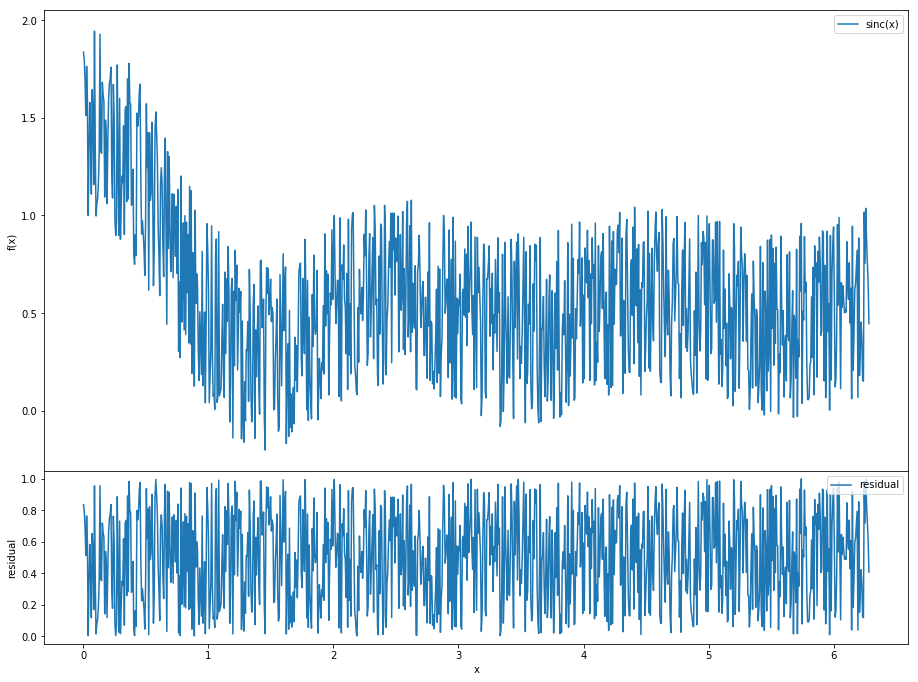

In [37]:
fig = plt.figure(figsize=(15,8))      #Figure object

# we can add axes with a method from the class figure
ax_data = fig.add_axes([0.1, 0.4, 0.8, 0.8])   #start x, start y, size x, size y
ax_residual = fig.add_axes([0.1, 0.1, 0.8, 0.3])

# this is one axis

ax_data.plot(x,y, label = 'sinc(x)') #plots are methods of the class axis
ax_data.legend()
ax_data.set_ylabel('f(x)')           #labels are attributes of the class axis
#The set_attribute is an inheritance of old object oriented languages where attributes in classes where private
# and you couldn't acces them (so methods like set_nameofattribute where created to set things)
#python is like the wild west, so you CAN do anything you want with the variables
# but it is a general consensus that putting underscores after variable names is a way to inform users that 
#certain variables 'should' be private (and not messed with)


# the other axis
ax_residual.plot(x, y - y_theory, label = 'residual')
ax_residual.legend(loc = 'upper right')
ax_residual.set_xlabel('x')
ax_residual.set_ylabel('residual')